# FVF Based OTA
SPDX-License-Identifier: Apache-2.0

|Name|Affiliation|IEEE Member|SSCS Member|
|:--:|:----------:|:----------:|:----------:|
|Subham Pal|National Institute of Technology(NIT) Durgapur, India|No|No|
|Ekadanta Soedarmadji|COLLEGE'S NAME|No|No|
|Shubham Kumar|Texas Instruments, India <br> Indian Institute of Technology(IIT) Kharagpur, India|No|No|

## 1. Introduction
This Notebook serves as an introduction to analysis, design and layout of FVF based OTA. It uses Python and open-source tools/frameworks to generate a FVF based OTA.
The flow includes,
1. **$g_m /I_d $ based sizing scripts**: Sizing transistors for specifications.
Pre-computed Look-up tables are utilized to get the sweet spot for the design.

2. **Schematic Design and Testbenches**: The schematic and a set of testbenches were implemented in *xschem* and simulated using *ngspice*. Simulation of cross-corner PVT variations for different tests were automated by *CACE*.

3. **Automated Layout**: Using *Glayout*, DRC clean pcells including fvf, low voltage current mirror, transmision gate, input pairs are implemented in Python. Placements and Routing of pcells are automated using Python to create a DRC & LVS clean FVF based OTA.


4. **Post-Layout Simulations**: PEX is performed using *Magic* and the extracted netlist is used in the post-layout simulations. Post-layout simulations across PVT variations are automated using *CACE*.

## 2. FVF based OTA
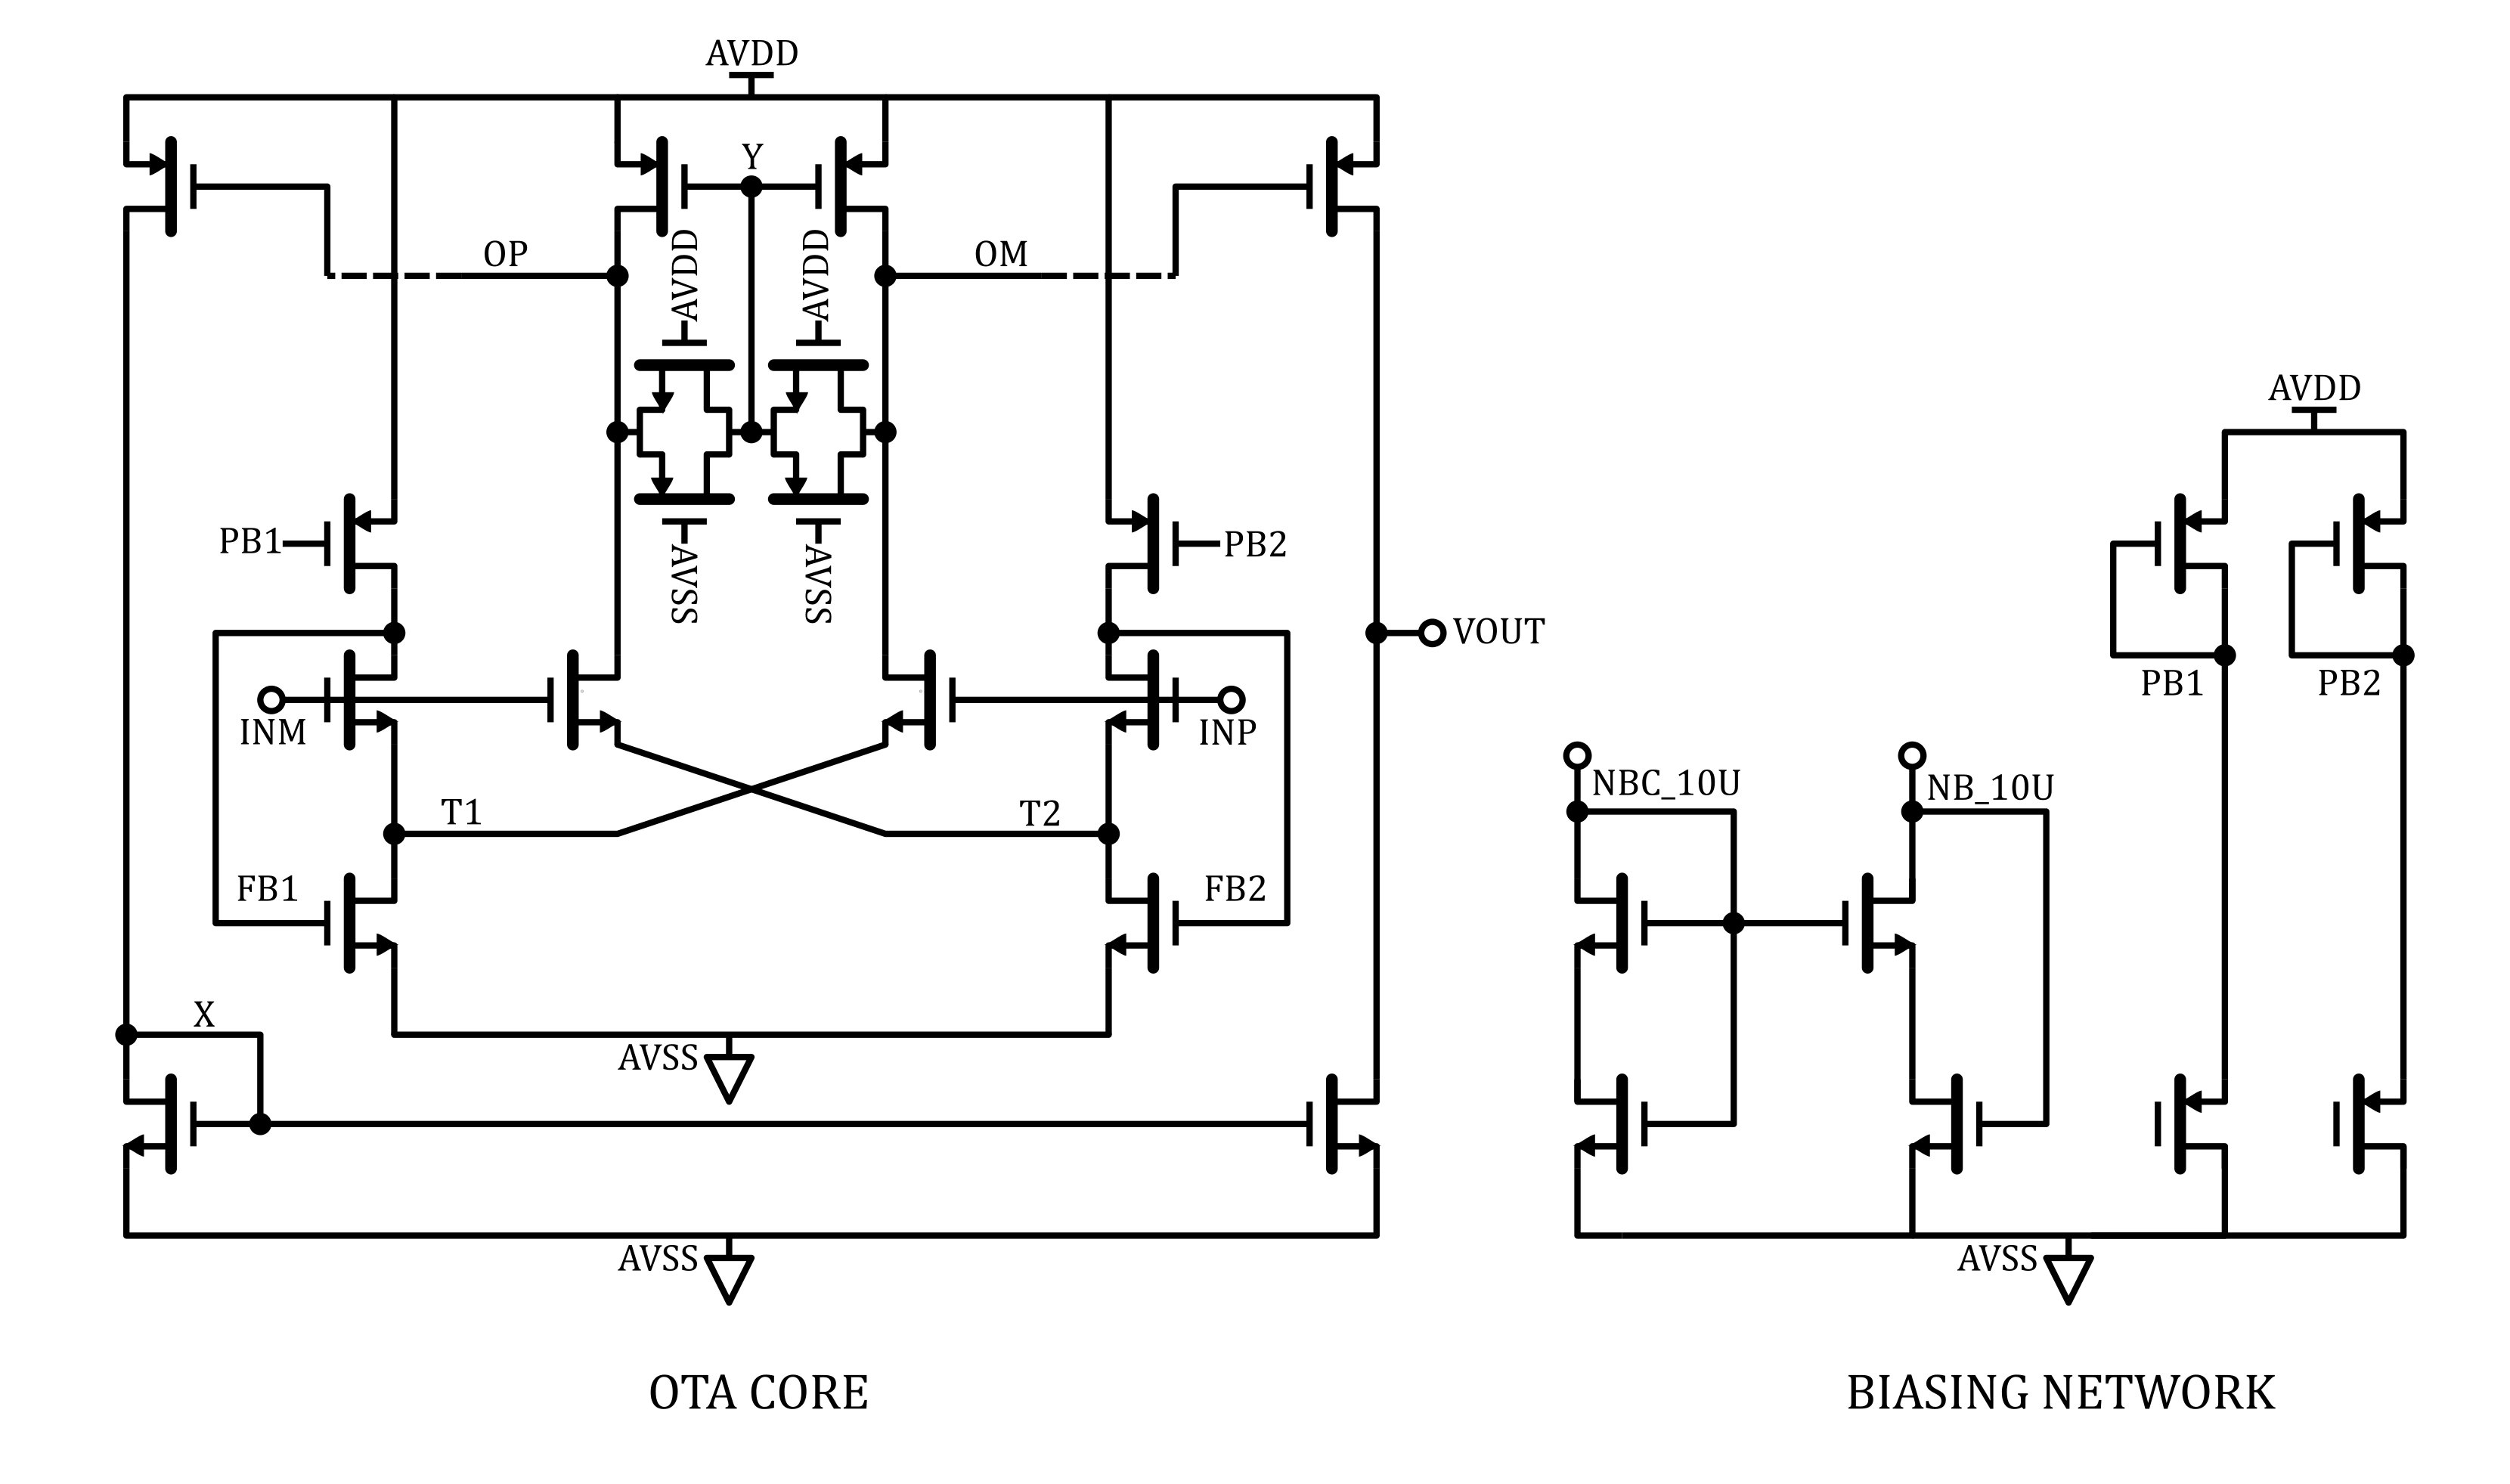

The OTA schematic is as shown above. Compared to the conventional OTAs biased by a tail current source, FVF based OTA is biased by a tail voltage source implemented as FVFs.<br>
The slew rate for the conventional OTA is dependent on the tail current source. A design for high slew rate for conventional OTA will imply burning proportinally more static power.<br>
While the FVF based OTA biased using tail voltage source (as FVFs) have no limitation on slewing current, infact the slewing current grows quadratically( also higher orders) with voltage difference, provinding orders higher slewing current. Thus breaking the slew and static power consumption trade-offs. <br>
The way in which the sources are cross-coupled allows using twice the $g_m$, at the same time doesn't compromises with linearity, PSRR, CMRR, Noise, etc.

More details on FVF based OTAs can be found in the following references.
1. R. G. Carvajal et al., "The flipped voltage follower: a useful cell for low-voltage low-power circuit design," in IEEE Transactions on Circuits and Systems I: Regular Papers, vol. 52, no. 7, pp. 1276-1291, July 2005, doi: [10.1109/TCSI.2005.851387](https://doi.org/10.1109/TCSI.2005.851387).
2. A. J. Lopez-Martin, S. Baswa, Jaime Ramirez-Angulo and R. G. Carvajal, "Low-Voltage Super class AB CMOS OTA cells with very high slew rate and power efficiency," in IEEE Journal of Solid-State Circuits, vol. 40, no. 5, pp. 1068-1077, May 2005, doi: [10.1109/JSSC.2005.845977](https://doi.org/10.1109/JSSC.2005.845977).








## 3. Sizing Guidelines
There are two loops involved,
1.   Local FVF Loop
2.   OTA Feedback Loop
which imposes stability constraints.

### 3.1 FVF Loop Constraints
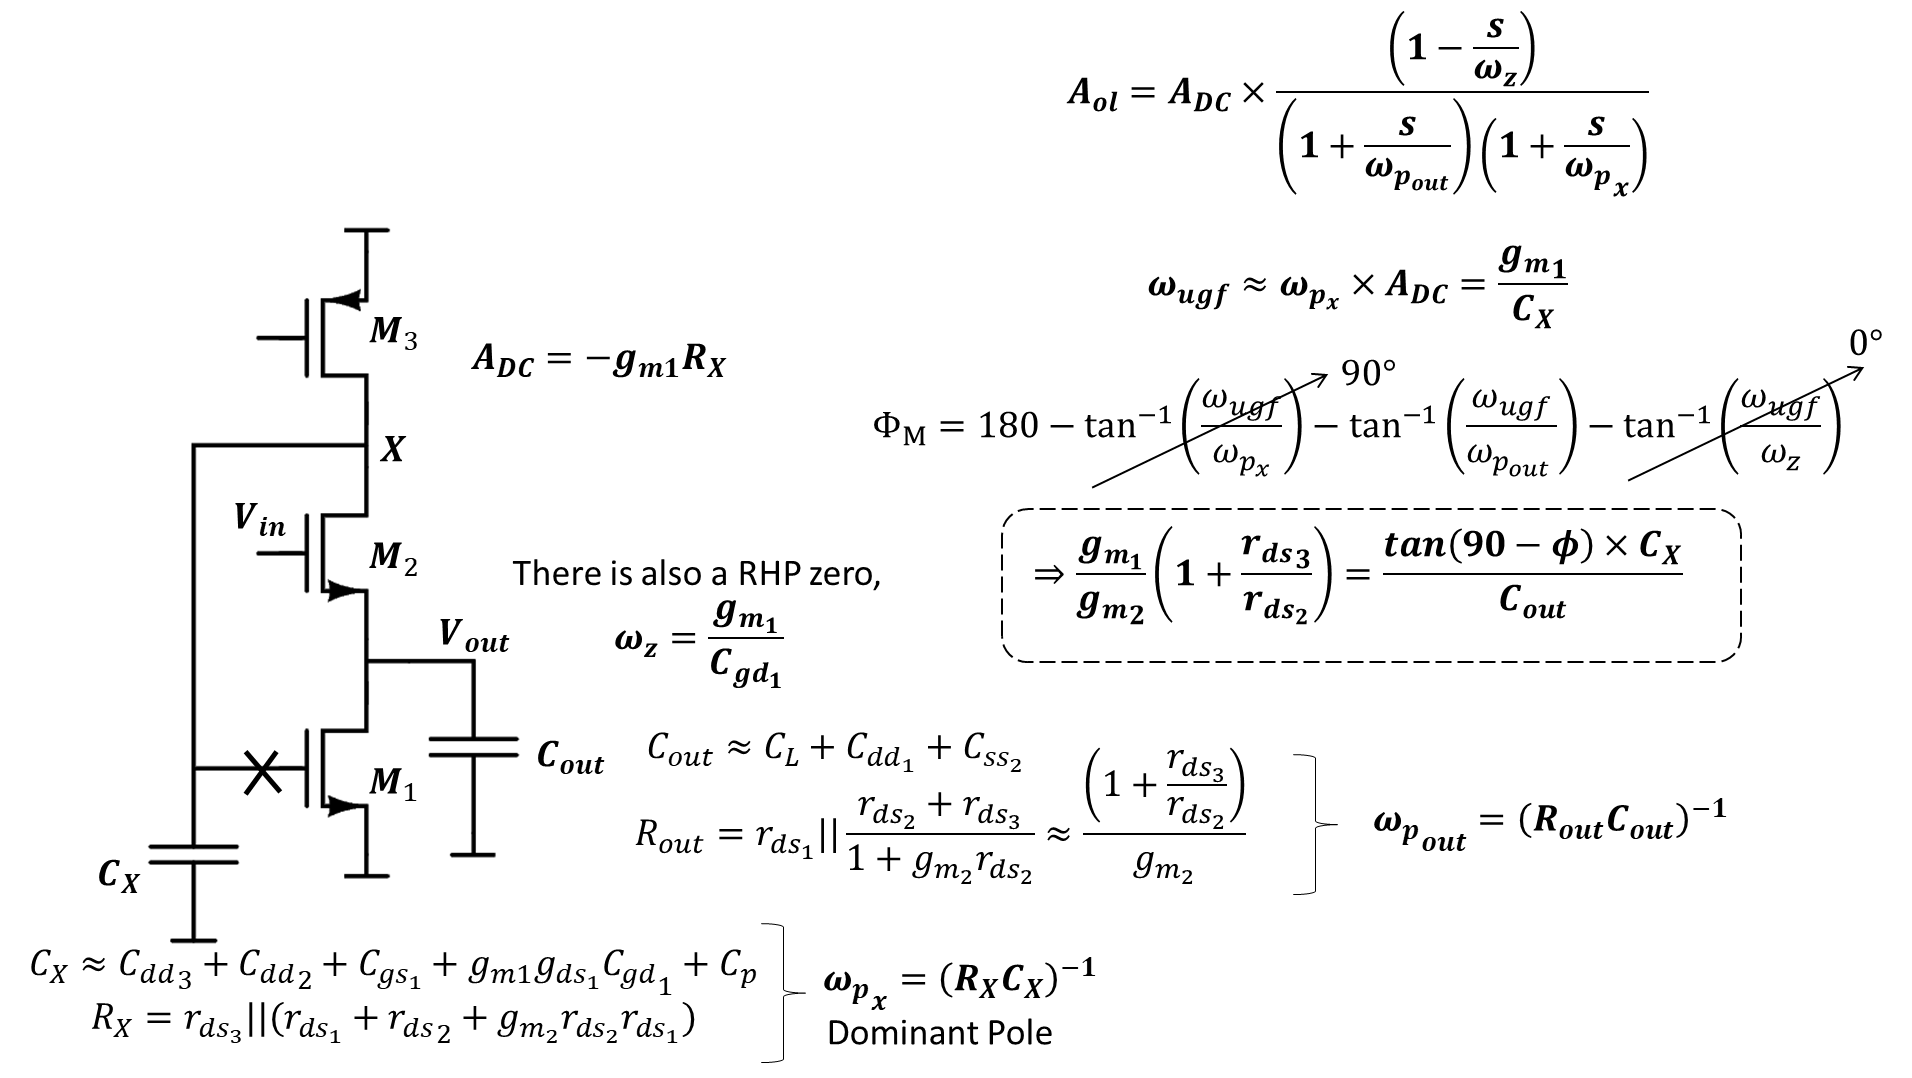

### 3.2 OTA Loop Constraints
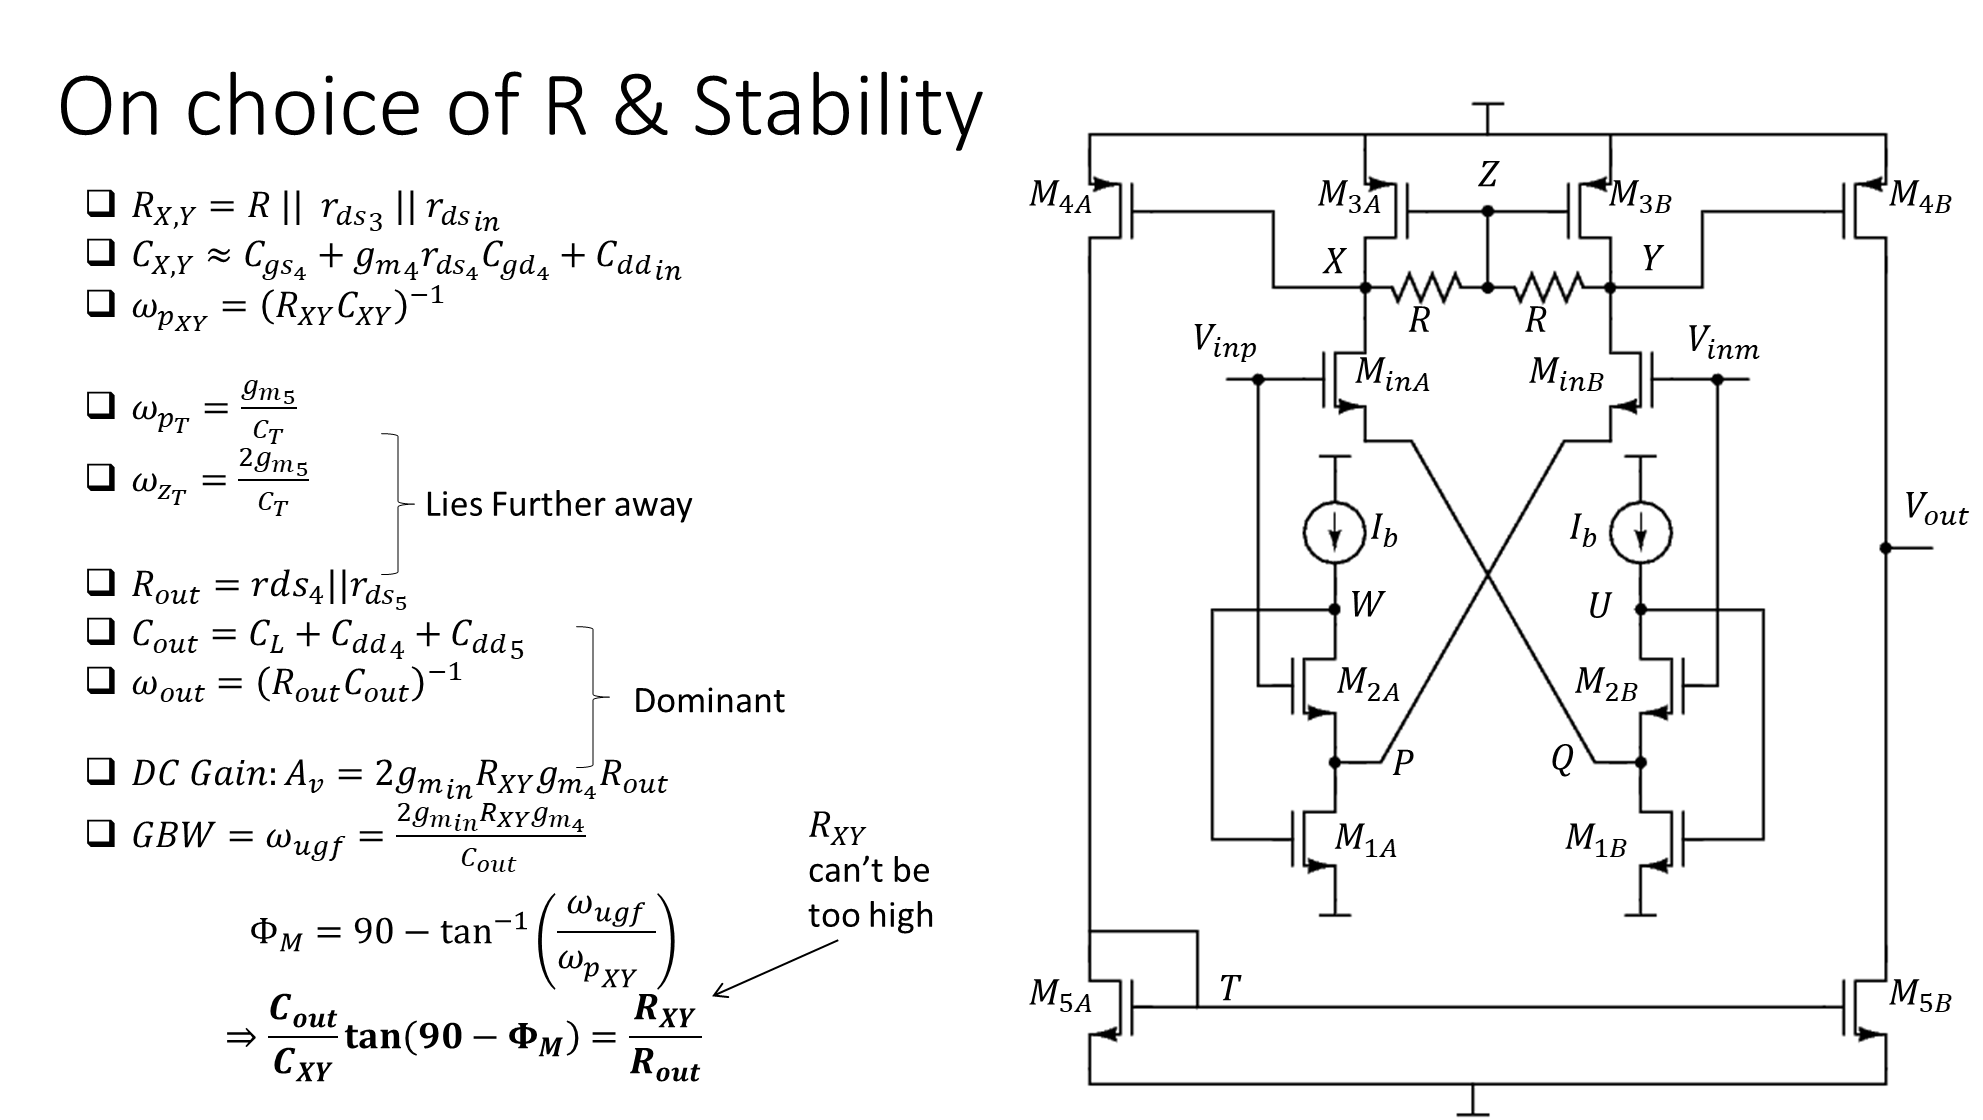

### 3.3 Sizing Scripts are followed to get a sweet spot for design
**The Sizing scripts can be accessed `scripts/Sizing_scripts`** <br>
The sizes of few transistors are modified for Mismatch/Noise(flicker)/Slew. Please refer to the actual schematics to get the sizes used in simulations.

## 4. Schematic Design and Testbenches


ota.svg


Following Testbenches are created,
1. tb_ac.sch : DC Gain, UGF, Phase Margin
2. tb_cmrr.sch : CMRR DC
3. tb_psrr.sch : PSRR DC
4. tb_lin.sch : HD2, HD3 ($0.8V_{pk-pk}$ @ 1kHz)
5. tb_noise.sch : Input Referred Noise (Integrated: 1kHz to 1MHz)
6. tb_power.sch : Power Consumption (OTA Core + Biasing Network)
7. tb_slew.sch : Positive and Negative Slew Rates


### 4.1 Schematic Simulations using CACE
Please refer to `sim_sch/cace/sim_sch.yaml` file to see the corner settings.
The above testbenches are simulated across PVT corners using CACE. With all tools(xschem and ngspice, PDKs) installed, CACE can be excuted by running `cace` from `sim_sch` directory.
# CACE Summary for OTA Schematic Simulations

**netlist source**: schematic

|      Parameter       |         Tool         |     Result      | Min Limit  |  Min Value   | Typ Target |  Typ Value   | Max Limit  |  Max Value   |  Status  |
| :------------------- | :------------------- | :-------------- | ---------: | -----------: | ---------: | -----------: | ---------: | -----------: | :------: |
| DC gain              | ngspice              | A0                   |             any |  40.062 dB |          any |  44.987 dB |          any |  52.226 dB |   Pass ✅    |
| Unity Gain Frequency | ngspice              | UGF                  |             any | 417097.000 Hz |          any | 826089.000 Hz |          any | 2059780.000 Hz |   Pass ✅    |
| Phase Margin         | ngspice              | PM                   |             any |   86.774 ° |          any |   89.349 ° |          any |   90.115 ° |   Pass ✅    |
| DC CMRR              | ngspice              | CMRR_DC              |             any | -84.205 dB |          any | -55.444 dB |          any | -41.906 dB |   Pass ✅    |
| DC PSRR              | ngspice              | PSRR_DC              |             any | -68.171 dB |          any | -51.774 dB |          any | -48.202 dB |   Pass ✅    |
| HD2 at 0.8V(p-p), 1kHz | ngspice              | HD2                  |             any |  32.874 dB |          any |  47.843 dB |          any |  65.088 dB |   Pass ✅    |
| HD3 at 0.8V(p-p), 1kHz | ngspice              | HD3                  |             any |  38.746 dB |          any |  53.906 dB |          any |  76.419 dB |   Pass ✅    |
| Noise:Vin(rms) (1kHz to 1MHz) | ngspice              | vin_noi_rms          |             any | 45.164 uVrms |          any | 57.088 uVrms |          any | 77.765 uVrms |   Pass ✅    |
| Rise Slew Rate       | ngspice              | rise_slew            |             any | 3.273 V/us |          any | 4.498 V/us |          any | 7.482 V/us |   Pass ✅    |
| Fall Slew Rate       | ngspice              | fall_slew            |             any | 2.147 V/us |          any | 3.240 V/us |          any | 5.228 V/us |   Pass ✅    |
| Total Static Power   | ngspice              | power_tot            |             any | 169.306 uW |          any | 183.448 uW |          any | 198.997 uW |   Pass ✅    |
| Power - OTA Core     | ngspice              | power_ota_core       |             any | 101.369 uW |          any | 111.447 uW |          any | 122.915 uW |   Pass ✅    |
| Power - OTA Bias     | ngspice              | power_ota_bias       |             any |  67.924 uW |          any |  72.003 uW |          any |  76.082 uW |   Pass ✅    |



## 5. Automated Layout using Glayout framework
The whole design can be broken into following p-cells:
1. Input Pair
2. **FVF cell**
3. **Low Voltage Current Mirror**
4. Current Mirror (Simple)
5. **Transmission Gate**
6. Interdigitated Cells

The above highlighted cells are designed from scratch and others are re-used from the existing repository.

This is followed by **Placement & Routing** automated using Python.

**The Glayout Python scripts can be accessed in `analog_vibes/scripts/Glayout/` path.**


### 5.5 Layout Demonstration

In [1]:
# Setup the environment for the OpenFASOC GDSFactory generator
# You only need to run this block once!

# Clone OpenFASoC
!git clone https://github.com/idea-fasoc/OpenFASOC
# Install python dependencies
!pip install sky130
!pip install gf180 prettyprinttree svgutils
!pip install gdsfactory==7.7.0

import pathlib
import os
# Install KLayout (via conda)
!curl -Ls https://micro.mamba.pm/api/micromamba/linux-64/latest | tar -xvj bin/micromamba
conda_prefix_path = pathlib.Path('conda-env')
CONDA_PREFIX = str(conda_prefix_path.resolve())
%env CONDA_PREFIX={CONDA_PREFIX}

!bin/micromamba create --yes --prefix $CONDA_PREFIX
# Install from the litex-hub channel
!bin/micromamba install --yes --prefix $CONDA_PREFIX \
                        --channel litex-hub \
                        --channel main \
                        klayout

fatal: destination path 'OpenFASOC' already exists and is not an empty directory.
  Using cached gf180-0.1.0-py3-none-any.whl.metadata (2.1 kB)
  Using cached PrettyPrintTree-2.0.1-py3-none-any.whl.metadata (9.6 kB)
  Using cached svgutils-0.3.4-py3-none-any.whl.metadata (1.1 kB)
  Using cached gdsfactory-7.16.0-py3-none-any.whl.metadata (11 kB)
  Using cached colorama-0.4.6-py2.py3-none-any.whl.metadata (17 kB)
  Using cached cmd2-2.5.7-py3-none-any.whl.metadata (13 kB)
  Using cached flatdict-4.0.1.tar.gz (8.3 kB)
  Preparing metadata (setup.py) ... done
  Using cached gdstk-0.9.58-cp310-cp310-manylinux_2_28_x86_64.whl.metadata (8.7 kB)
  Using cached pydantic-2.6.4-py3-none-any.whl.metadata (85 kB)
  Using cached kfactory-0.11.4-py3-none-any.whl.metadata (4.5 kB)
  Using cached pyglet-1.5.29-py3-none-any.whl.metadata (7.6 kB)
  Using cached trimesh-4.1.8-py3-none-any.whl.metadata (18 kB)
  Using cached ipycytoscape-1.3.3-py2.py3-none-any.whl.metadata (7.5 kB)
  Using cached ipympl-0

In [2]:
# Setup the environment for the OpenFASOC GDSFactory generator

# Adding micro-mamba binary directory to the PATH
# This directory contains Klayout
import pathlib
import os
conda_prefix_path = pathlib.Path('conda-env')
CONDA_PREFIX = str(conda_prefix_path.resolve())
%env CONDA_PREFIX={CONDA_PREFIX}
# Add conda packages to the PATH
PATH = os.environ['PATH']
%env PATH={PATH}:{CONDA_PREFIX}/bin

%cd /content/OpenFASOC/openfasoc/generators/glayout

env: CONDA_PREFIX=/content/conda-env
env: PATH=/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/content/conda-env/bin
/content/OpenFASOC/openfasoc/generators/glayout


In [3]:
from glayout.flow.pdk.sky130_mapped import sky130_mapped_pdk as sky130
from glayout.flow.pdk.gf180_mapped  import gf180_mapped_pdk  as gf180
import gdstk
import svgutils.transform as sg
import IPython.display
from IPython.display import clear_output
import ipywidgets as widgets

# Redirect all outputs here
hide = widgets.Output()

# Used to display gds file inline
def display_gds(gds_file, scale = 3):
  # Generate an SVG image
  top_level_cell = gdstk.read_gds(gds_file).top_level()[0]
  top_level_cell.write_svg('out.svg')
  # Scale the image for displaying
  fig = sg.fromfile('out.svg')
  fig.set_size((str(float(fig.width) * scale), str(float(fig.height) * scale)))
  fig.save('out.svg')

  # Display the image
  IPython.display.display(IPython.display.SVG('out.svg'))

def display_component(component, scale = 3):
  # Save to a GDS file
  with hide:
    component.write_gds("out.gds")
  display_gds('out.gds', scale)

### 5.5.1 Layout Generator For FVF Cell

2024-12-01 14:17:21.040 | WARNING  | gdsfactory.pdk:get_active_pdk:733 - No active PDK. Activating generic PDK.

2024-12-01 14:17:21.912 | INFO     | gdsfactory.technology.layer_views:__init__:790 - Importing LayerViews from YAML file: '/usr/local/lib/python3.10/dist-packages/gdsfactory/generic_tech/layer_views.yaml'.
2024-12-01 14:17:21.917 | INFO     | gdsfactory.pdk:activate:337 - 'generic' PDK is now active
2024-12-01 14:17:21.935 | INFO     | gdsfactory.pdk:activate:337 - 'sky130' PDK is now active
2024-12-01 14:17:33.293 | INFO     | gdsfactory.component:_write_library:1851 - Wrote to 'fvf_example.gds'


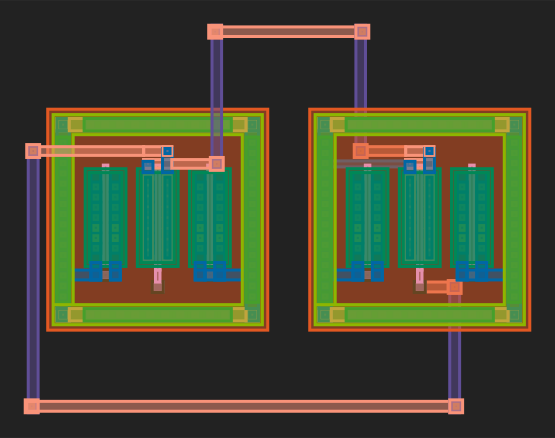

In [4]:
from glayout.flow.pdk.mappedpdk import MappedPDK
from gdsfactory.cell import cell
from gdsfactory.component import Component
from gdsfactory import Component
from glayout.flow.primitives.fet import nmos, pmos, multiplier
from glayout.flow.pdk.util.comp_utils import evaluate_bbox, prec_center, prec_ref_center, align_comp_to_port
from glayout.flow.pdk.util.snap_to_grid import component_snap_to_grid
from glayout.flow.pdk.util.port_utils import rename_ports_by_orientation
from glayout.flow.routing.straight_route import straight_route
from glayout.flow.routing.c_route import c_route
from glayout.flow.routing.L_route import L_route
from glayout.flow.primitives.guardring import tapring
from glayout.flow.pdk.util.port_utils import add_ports_perimeter
from glayout.flow.spice.netlist import Netlist
from glayout.flow.primitives.via_gen import via_stack,via_array
from gdsfactory.components import text_freetype, rectangle
from glayout.flow.placement.two_transistor_interdigitized import two_nfet_interdigitized, two_pfet_interdigitized
from typing import Literal, Optional


def fvf_netlist(fet_1: Component, fet_2: Component) -> Netlist:

         netlist = Netlist(circuit_name='FLIPPED_VOLTAGE_FOLLOWER', nodes=['VIN', 'VBULK', 'VOUT', 'Ib'])

         netlist.connect_netlist(fet_1.info['netlist'], [('D', 'Ib'), ('G', 'VIN'), ('S', 'VOUT'), ('B', 'VBULK')])
         netlist.connect_netlist(fet_2.info['netlist'], [('D', 'VOUT'), ('G', 'Ib'), ('S', 'VBULK'), ('B', 'VBULK')])

         return netlist

def sky130_add_fvf_labels(fvf_in: Component) -> Component:

    fvf_in.unlock()
    # define layers`
    met1_pin = (68,16)
    met1_label = (68,5)
    met2_pin = (69,16)
    met2_label = (69,5)
    # list that will contain all port/comp info
    move_info = list()
    # create labels and append to info list
    # gnd
    gnd2label = rectangle(layer=met1_pin,size=(0.5,0.5),centered=True).copy()
    gnd2label.add_label(text="VBULK",layer=met1_label)
    move_info.append((gnd2label,fvf_in.ports["B_tie_N_top_met_N"],None))

    #currentbias
    ibiaslabel = rectangle(layer=met2_pin,size=(0.5,0.5),centered=True).copy()
    ibiaslabel.add_label(text="Ib",layer=met2_label)
    move_info.append((ibiaslabel,fvf_in.ports["A_drain_bottom_met_N"],None))

    # output (3rd stage)
    outputlabel = rectangle(layer=met2_pin,size=(0.5,0.5),centered=True).copy()
    outputlabel.add_label(text="VOUT",layer=met2_label)
    move_info.append((outputlabel,fvf_in.ports["A_source_bottom_met_N"],None))

    # input
    inputlabel = rectangle(layer=met1_pin,size=(0.5,0.5),centered=True).copy()
    inputlabel.add_label(text="VIN",layer=met1_label)
    move_info.append((inputlabel,fvf_in.ports["A_multiplier_0_gate_N"], None))

    # move everything to position
    for comp, prt, alignment in move_info:
        alignment = ('c','b') if alignment is None else alignment
        compref = align_comp_to_port(comp, prt, alignment=alignment)
        fvf_in.add(compref)
    return fvf_in.flatten()

@cell
def  flipped_voltage_follower(
        pdk: MappedPDK,
        device_type: str = "nmos",
        placement: str = "horizontal",
        width: tuple[float,float] = (3,3),
        length: tuple[float,float] = (None,None),
        fingers: tuple[int,int] = (1,1),
        multipliers: tuple[int,int] = (1,1),
        dummy_1: tuple[bool,bool] = (True,True),
        dummy_2: tuple[bool,bool] = (True,True),
        tie_layers1: tuple[str,str] = ("met2","met1"),
        tie_layers2: tuple[str,str] = ("met2","met1"),
        sd_rmult: int=1,
        **kwargs
        ) -> Component:
    """
    creates a Flipped Voltage Follower
    pdk: pdk to use
    device_type: either "nmos" or "pmos"
    placement: either "horizontal" or "vertical"
    width: (input fet, feedback fet)
    length: (input fet, feedback fet)
    fingers: (input fet, feedback fet)
    multipliers: (input fet, feedback fet)
    dummy_1: dummy for input fet
    dummy_2: dummy for feedback fet
    dnwell: adds Deep N-well
    sb_short: shorts the source and bulk of input fet if True
    tie_layers1: tie layers for input fet
    tie_layers2: tie layers for feedback fet
    sd_rmult: sd_rmult for both fets
    **kwargs: any kwarg that is supported by nmos and pmos
    NB:- currently LVS is passed only for nmos without sd_short and pmos with sd_short
    """

    #top level component
    top_level = Component(name="flipped_voltage_follower")

    #two fets
    if device_type == "nmos":
        fet_1 = nmos(pdk, width=width[0], fingers=fingers[0], multipliers=multipliers[0], with_dummy=dummy_1, with_dnwell=False, with_substrate_tap=False, length=length[0], tie_layers=tie_layers1, sd_rmult=sd_rmult, **kwargs)
        fet_2 = nmos(pdk, width=width[1], fingers=fingers[1], multipliers=multipliers[1], with_dummy=dummy_2, with_dnwell=False, with_substrate_tap=False, length=length[1], tie_layers=tie_layers2, sd_rmult=sd_rmult, **kwargs)
        well = "pwell"
    elif device_type == "pmos":
        fet_1 = pmos(pdk, width=width[0], fingers=fingers[0], multipliers=multipliers[0], with_dummy=dummy_1, with_substrate_tap=False, length=length[0], tie_layers=tie_layers1, sd_rmult=sd_rmult, **kwargs)
        fet_2 = pmos(pdk, width=width[1], fingers=fingers[1], multipliers=multipliers[1], with_dummy=dummy_2, with_substrate_tap=False, length=length[1], tie_layers=tie_layers2, sd_rmult=sd_rmult, **kwargs)
        well = "nwell"
    fet_1_ref = top_level << fet_1
    fet_2_ref = top_level << fet_2

    #Relative move
    ref_dimensions = evaluate_bbox(fet_2)
    if placement == "horizontal":
        fet_2_ref.movex(fet_1_ref.xmax + ref_dimensions[0]/2 + pdk.util_max_metal_seperation()+1)
    if placement == "vertical":
        fet_2_ref.movey(fet_1_ref.ymin - ref_dimensions[1]/2 - pdk.util_max_metal_seperation()-1)

    #Routing
    viam2m3 = via_stack(pdk, "met2", "met3", centered=True)
    drain_1_via = top_level << viam2m3
    source_1_via = top_level << viam2m3
    drain_2_via = top_level << viam2m3
    gate_2_via = top_level << viam2m3
    drain_1_via.move(fet_1_ref.ports["multiplier_0_drain_W"].center).movex(-0.5*evaluate_bbox(fet_1)[1])
    source_1_via.move(fet_1_ref.ports["multiplier_0_source_E"].center).movex(1.5)
    drain_2_via.move(fet_2_ref.ports["multiplier_0_drain_W"].center).movex(-1.5)
    gate_2_via.move(fet_2_ref.ports["multiplier_0_gate_E"].center).movex(1)

    top_level << straight_route(pdk, fet_1_ref.ports["multiplier_0_source_E"], source_1_via.ports["bottom_met_W"])
    top_level << straight_route(pdk, fet_2_ref.ports["multiplier_0_drain_W"], drain_2_via.ports["bottom_met_E"])
    top_level << c_route(pdk, source_1_via.ports["top_met_N"], drain_2_via.ports["top_met_N"], extension=1.2*width[1], width1=0.32, width2=0.32, cwidth=0.32, e1glayer="met3", e2glayer="met3", cglayer="met2")
    top_level << straight_route(pdk, fet_1_ref.ports["multiplier_0_drain_W"], drain_1_via.ports["bottom_met_E"])
    top_level << c_route(pdk, drain_1_via.ports["top_met_S"], gate_2_via.ports["top_met_S"], extension=1.2*width[1], cglayer="met2")
    top_level << straight_route(pdk, fet_2_ref.ports["multiplier_0_gate_E"], gate_2_via.ports["bottom_met_W"])

    top_level << straight_route(pdk, fet_2_ref.ports["multiplier_0_source_W"], fet_2_ref.ports["tie_W_top_met_W"], glayer1=tie_layers2[1], width=0.2*sd_rmult, fullbottom=True)

    #Renaming Ports
    top_level.add_ports(fet_1_ref.get_ports_list(), prefix="A_")
    top_level.add_ports(fet_2_ref.get_ports_list(), prefix="B_")
    top_level.add_ports(drain_1_via.get_ports_list(), prefix="A_drain_")
    top_level.add_ports(source_1_via.get_ports_list(), prefix="A_source_")
    top_level.add_ports(drain_2_via.get_ports_list(), prefix="B_drain_")
    top_level.add_ports(gate_2_via.get_ports_list(), prefix="B_gate_")
    #add dnwell
    if well == "nwell":
        top_level.add_padding(layers=(pdk.get_glayer("nwell"),),default= 1 )


    comp = Component()
    compref = comp << top_level
    correctionxy = prec_center(compref)
    compref.movex(correctionxy[0]).movey(correctionxy[1])

    component = component_snap_to_grid(rename_ports_by_orientation(top_level))

    component.info['netlist'] = fvf_netlist(fet_1, fet_2)

    return component
flipped_voltage_follower(sky130).write_gds("fvf_example.gds")
display_gds("fvf_example.gds")

### 5.5.2 Layout Generator For Transmission Gate

2024-12-01 14:18:37.450 | INFO     | gdsfactory.component:_write_library:1851 - Wrote to 'tg_example.gds'


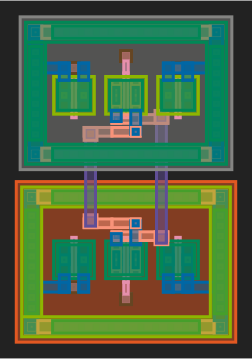

In [5]:

def tg_netlist(nfet: Component, pfet: Component) -> Netlist:

         netlist = Netlist(circuit_name='Transmission_Gate', nodes=['VIN', 'VSS', 'VOUT', 'VCC'])
         netlist.connect_netlist(nfet.info['netlist'], [('D', 'VOUT'), ('G', 'VCC'), ('S', 'VIN'), ('B', 'VSS')])
         netlist.connect_netlist(pfet.info['netlist'], [('D', 'VOUT'), ('G', 'VSS'), ('S', 'VIN'), ('B', 'VCC')])

         return netlist

@cell
def  transmission_gate(
        pdk: MappedPDK,
        width: tuple[float,float] = (1,1),
        length: tuple[float,float] = (None,None),
        fingers: tuple[int,int] = (1,1),
        multipliers: tuple[int,int] = (1,1),
        substrate_tap: bool = False,
        tie_layers: tuple[str,str] = ("met2","met1"),
        **kwargs
        ) -> Component:
    """
    creates a transmission gate
    tuples are in (NMOS,PMOS) order
    **kwargs are any kwarg that is supportef by nmos and pmos
    """

    #top level component
    top_level = Component(name="transmission_gate")

    #two fets
    nfet = nmos(pdk, width=width[0], fingers=fingers[0], multipliers=multipliers[0], with_dummy=True, with_dnwell=False,  with_substrate_tap=False, length=length[0], **kwargs)
    pfet = pmos(pdk, width=width[1], fingers=fingers[1], multipliers=multipliers[1], with_dummy=True, with_substrate_tap=False, length=length[1], **kwargs)
    nfet_ref = top_level << nfet
    pfet_ref = top_level << pfet
    pfet_ref = rename_ports_by_orientation(pfet_ref.mirror_y())

    #Relative move
    pfet_ref.movey(nfet_ref.ymax + evaluate_bbox(pfet_ref)[1]/2 + pdk.util_max_metal_seperation())

    #Routing
    top_level << c_route(pdk, nfet_ref.ports["multiplier_0_source_E"], pfet_ref.ports["multiplier_0_source_E"])
    top_level << c_route(pdk, nfet_ref.ports["multiplier_0_drain_W"], pfet_ref.ports["multiplier_0_drain_W"], viaoffset=False)

    #Renaming Ports
    top_level.add_ports(nfet_ref.get_ports_list(), prefix="N_")
    top_level.add_ports(pfet_ref.get_ports_list(), prefix="P_")

    #substrate tap
    if substrate_tap:
            substrate_tap_encloses =((evaluate_bbox(top_level)[0]+pdk.util_max_metal_seperation()), (evaluate_bbox(top_level)[1]+pdk.util_max_metal_seperation()))
            guardring_ref = top_level << tapring(
            pdk,
            enclosed_rectangle=substrate_tap_encloses,
            sdlayer="p+s/d",
            horizontal_glayer='met2',
            vertical_glayer='met1',
        )
            guardring_ref.move(nfet_ref.center).movey(evaluate_bbox(pfet_ref)[1]/2 + pdk.util_max_metal_seperation()/2)
            top_level.add_ports(guardring_ref.get_ports_list(),prefix="tap_")


    top_level.info['netlist'] = tg_netlist(nfet, pfet)

    return component_snap_to_grid(rename_ports_by_orientation(top_level))

transmission_gate(sky130).write_gds("tg_example.gds")
display_gds("tg_example.gds")

### 5.5.3 Layout Generator For Low Voltage Current Mirror (By Re-Using FVF Block)

2024-12-01 14:20:17.858 | INFO     | gdsfactory.component:_write_library:1851 - Wrote to 'lvcm_example.gds'


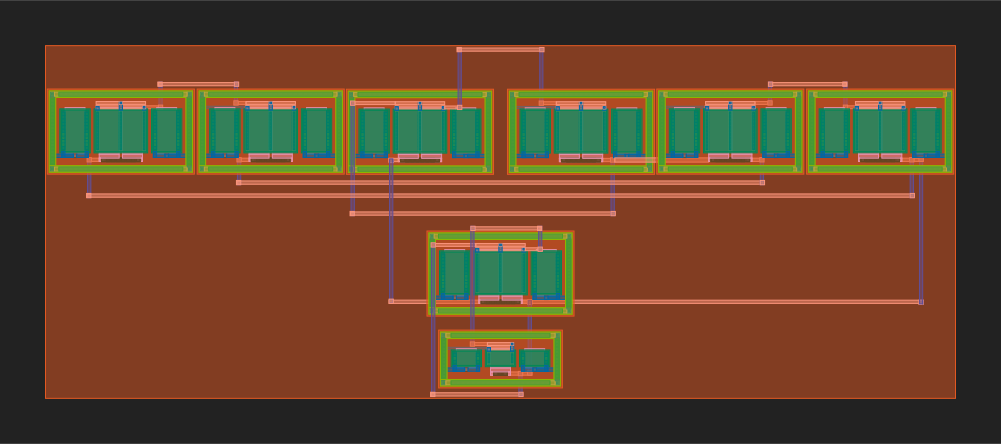

In [6]:
def  low_voltage_cmirror(
        pdk: MappedPDK,
        width:  tuple[float,float] = (4.15,1.42),
        length: float = 2,
        fingers: tuple[int,int] = (2,1),
        multipliers: tuple[int,int] = (1,1),
        ) -> Component:
    """
    A low voltage N type current mirror
    """
    #top level component
    top_level = Component("Low_voltage_N-type_current_mirror")

    #input branch 2
    cascode_fvf = flipped_voltage_follower(pdk, width=(width[0],width[0]), length=(length,length), fingers=(fingers[0],fingers[0]), multipliers=(multipliers[0],multipliers[0]))
    cascode_fvf_ref = prec_ref_center(cascode_fvf)
    top_level.add(cascode_fvf_ref)

    #input branch 1
    bias_fvf = flipped_voltage_follower(pdk, width=(width[0],width[1]), length=(length,length), fingers=(fingers[0],fingers[1]), multipliers=(multipliers[0],multipliers[1]), placement="vertical")
    bias_fvf_ref = prec_ref_center(bias_fvf,(0,-18))
    top_level.add(bias_fvf_ref)

    #creating fets for output branches
    fet_1 = nmos(pdk, width=width[0], fingers=fingers[0], multipliers=multipliers[0], with_dummy=True, with_dnwell=False,  with_substrate_tap=False, length=length)
    fet_1_ref = prec_ref_center(fet_1,(-23,0))
    fet_2_ref =prec_ref_center(fet_1,(-38,0))
    fet_3_ref =prec_ref_center(fet_1,(23,0))
    fet_4_ref =prec_ref_center(fet_1,(38,0))
    top_level.add(fet_1_ref)
    top_level.add(fet_2_ref)
    top_level.add(fet_3_ref)
    top_level.add(fet_4_ref)

    top_level << c_route(pdk, bias_fvf_ref.ports["A_multiplier_0_gate_E"], bias_fvf_ref.ports["B_gate_bottom_met_E"])
    top_level << c_route(pdk, cascode_fvf_ref.ports["A_multiplier_0_gate_W"], bias_fvf_ref.ports["A_multiplier_0_gate_W"])
    top_level << straight_route(pdk, cascode_fvf_ref.ports["B_gate_bottom_met_E"], fet_3_ref.ports["multiplier_0_gate_W"])

    #creating vias for routing
    viam2m3 = via_stack(pdk, "met2", "met3", centered=True)
    gate_1_via = top_level << viam2m3
    gate_1_via.move(fet_1_ref.ports["multiplier_0_gate_W"].center).movex(-1)
    gate_2_via = top_level << viam2m3
    gate_2_via.move(fet_2_ref.ports["multiplier_0_gate_W"].center).movex(-1)
    gate_3_via = top_level << viam2m3
    gate_3_via.move(fet_3_ref.ports["multiplier_0_gate_E"].center).movex(1)
    gate_4_via = top_level << viam2m3
    gate_4_via.move(fet_4_ref.ports["multiplier_0_gate_E"].center).movex(1)

    source_2_via = top_level << viam2m3
    drain_1_via = top_level << viam2m3
    source_2_via.move(fet_2_ref.ports["multiplier_0_source_E"].center).movex(1.5)
    drain_1_via.move(fet_1_ref.ports["multiplier_0_drain_W"].center).movex(-1)

    source_4_via = top_level << viam2m3
    drain_3_via = top_level << viam2m3
    source_4_via.move(fet_4_ref.ports["multiplier_0_source_W"].center).movex(-1)
    drain_3_via.move(fet_3_ref.ports["multiplier_0_drain_E"].center).movex(1.5)

    #routing
    top_level << straight_route(pdk, fet_2_ref.ports["multiplier_0_source_E"], source_2_via.ports["bottom_met_W"])
    top_level << straight_route(pdk, fet_1_ref.ports["multiplier_0_drain_W"], drain_1_via.ports["bottom_met_E"])
    top_level << straight_route(pdk, fet_4_ref.ports["multiplier_0_source_W"], source_4_via.ports["bottom_met_E"])
    top_level << straight_route(pdk, fet_3_ref.ports["multiplier_0_drain_E"], drain_3_via.ports["bottom_met_W"])
    top_level << c_route(pdk, source_2_via.ports["top_met_N"], drain_1_via.ports["top_met_N"], extension=1.5, width1=0.32, width2=0.32, cwidth=0.32, e1glayer="met3", e2glayer="met3", cglayer="met2")
    top_level << c_route(pdk, source_4_via.ports["top_met_N"], drain_3_via.ports["top_met_N"], extension=1.5, width1=0.32, width2=0.32, cwidth=0.32, e1glayer="met3", e2glayer="met3", cglayer="met2")
    top_level << c_route(pdk, bias_fvf_ref.ports["A_multiplier_0_gate_E"], gate_4_via.ports["bottom_met_E"], width1=0.32, width2=0.32, cwidth=0.32)


    top_level << straight_route(pdk, fet_1_ref.ports["multiplier_0_gate_W"], gate_1_via.ports["bottom_met_E"])
    top_level << straight_route(pdk, fet_2_ref.ports["multiplier_0_gate_W"], gate_2_via.ports["bottom_met_E"])
    top_level << straight_route(pdk, fet_3_ref.ports["multiplier_0_gate_E"], gate_3_via.ports["bottom_met_W"])
    top_level << straight_route(pdk, fet_4_ref.ports["multiplier_0_gate_E"], gate_4_via.ports["bottom_met_W"])

    top_level << c_route(pdk, gate_1_via.ports["top_met_S"], gate_3_via.ports["top_met_S"], extension=1.9, cglayer='met2')
    top_level << c_route(pdk, gate_2_via.ports["top_met_S"], gate_4_via.ports["top_met_S"], extension=3.2, cglayer='met2')

    top_level << straight_route(pdk, fet_1_ref.ports["multiplier_0_source_W"], fet_1_ref.ports["tie_W_top_met_W"], glayer1='met1', width=0.2)
    top_level << straight_route(pdk, fet_3_ref.ports["multiplier_0_source_W"], fet_3_ref.ports["tie_W_top_met_W"], glayer1='met1', width=0.2)

    #adding a pwell
    top_level.add_padding(layers=(pdk.get_glayer("pwell"),),default=pdk.get_grule("pwell", "active_tap")["min_enclosure"], )

    top_level.add_ports(bias_fvf_ref.get_ports_list(), prefix="M_1_")
    top_level.add_ports(cascode_fvf_ref.get_ports_list(), prefix="M_2_")
    top_level.add_ports(fet_1_ref.get_ports_list(), prefix="M_3_B_")
    top_level.add_ports(fet_2_ref.get_ports_list(), prefix="M_3_A_")
    top_level.add_ports(fet_3_ref.get_ports_list(), prefix="M_4_B_")
    top_level.add_ports(fet_4_ref.get_ports_list(), prefix="M_4_A_")

    return component_snap_to_grid(rename_ports_by_orientation(top_level))

low_voltage_cmirror(sky130).write_gds("lvcm_example.gds")
display_gds("lvcm_example.gds", 1)

In [7]:
# Used for generating Inter-digitated-Transistors
def generic_4T_interdigitzed(
    pdk: MappedPDK,
    top_row_device: Literal["nfet", "pfet"],
    bottom_row_device: Literal["nfet", "pfet"],
    numcols: int,
    length: float=None,
    with_substrate_tap: bool = True,
    top_kwargs: Optional[dict]=None,
    bottom_kwargs: Optional[dict]=None
):
    if top_kwargs is None:
        top_kwargs = dict()
    if bottom_kwargs is None:
        bottom_kwargs = dict()
    # place
    toplvl = Component()
    if top_row_device=="nfet":
        toprow = toplvl << two_nfet_interdigitized(pdk,numcols,with_substrate_tap=False,length=length,**top_kwargs)
    else:
        toprow = toplvl << two_pfet_interdigitized(pdk,numcols,with_substrate_tap=False,length=length,**top_kwargs)
    if bottom_row_device=="nfet":
        bottomrow = toplvl << two_nfet_interdigitized(pdk,numcols,with_substrate_tap=False,length=length,**bottom_kwargs)
    else:
        bottomrow = toplvl << two_pfet_interdigitized(pdk,numcols,with_substrate_tap=False,length=length,**bottom_kwargs)
    # move
    toprow.movey(pdk.snap_to_2xgrid((evaluate_bbox(bottomrow)[1]/2 + evaluate_bbox(toprow)[1]/2 + pdk.util_max_metal_seperation())))
    # add substrate tap
    if with_substrate_tap:
        substrate_tap = tapring(pdk, enclosed_rectangle=pdk.snap_to_2xgrid(evaluate_bbox(toplvl.flatten(),padding=pdk.util_max_metal_seperation())))
        substrate_tap_ref = toplvl << movey(substrate_tap,destination=pdk.snap_to_2xgrid(toplvl.flatten().center[1],snap4=True))
        toplvl.add_ports(substrate_tap_ref.get_ports_list(),prefix="substratetap_")
    # add ports
    toplvl.add_ports(toprow.get_ports_list(),prefix="top_")
    toplvl.add_ports(bottomrow.get_ports_list(),prefix="bottom_")
    # flag for smart route
    toplvl.info["route_genid"] = "four_transistor_interdigitized"
    return toplvl

### 5.5.4 Layout Generator For PMOS Loads (Stage1 and Stage2) using Inter-digitated-Transistors defined above

2024-12-01 14:22:00.402 | INFO     | gdsfactory.component:_write_library:1851 - Wrote to 'pblock_example.gds'


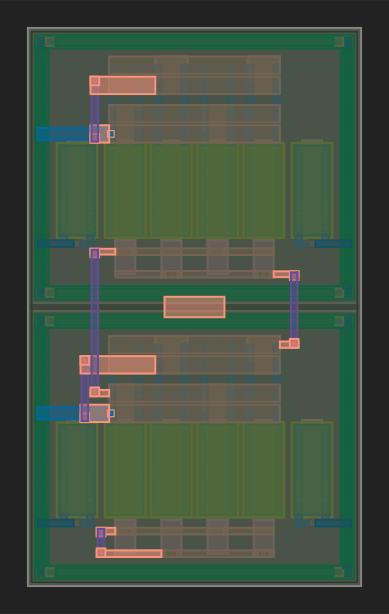

In [8]:
def  p_block(
        pdk: MappedPDK,
        width: float = 4.5,
        length: float = 1,
        fingers: int = 1,
        ratio: int = 1,
        ) -> Component:
    """
    p_block for super class AB OTA

    """
    #top level component
    top_level = Component(name="p_block")
    top_kwargs = {
            "fingers": ratio*fingers,
            "width": width,
            "with_tie": True,
            "sd_rmult":3
            }
    bottom_kwargs = {
            "fingers": fingers,
            "width": width,
            "with_tie": True,
            "sd_rmult":3
            }

    p_block = generic_4T_interdigitzed(pdk, top_row_device = "pfet", bottom_row_device = "pfet", numcols = 2, length = length, with_substrate_tap = False, top_kwargs = top_kwargs, bottom_kwargs = bottom_kwargs)
    p_block_ref = top_level << p_block

    top_level << c_route(pdk, p_block.ports["top_A_0_gate_W"], p_block.ports["bottom_A_0_drain_W"], width1=0.29, width2=0.32, cwidth=0.32)
    top_level << c_route(pdk, p_block.ports["top_B_1_gate_E"], p_block.ports["bottom_B_1_drain_E"], width1=0.29, width2=0.32, cwidth=0.32)
    top_level << c_route(pdk, p_block.ports["bottom_A_0_gate_W"], p_block.ports["bottom_B_0_gate_W"])

    top_level << c_route(pdk, p_block.ports["top_A_0_source_W"], p_block.ports["top_B_0_source_W"])
    top_level << straight_route(pdk, p_block.ports["top_A_0_source_W"], p_block.ports["top_welltie_W_top_met_W"], glayer1='met1', width=0.6)
    top_level << c_route(pdk, p_block.ports["bottom_A_0_source_W"], p_block.ports["bottom_B_0_source_W"], extension=1)
    top_level << straight_route(pdk, p_block.ports["bottom_A_0_source_W"], p_block.ports["bottom_welltie_W_top_met_W"], glayer1='met1', width=0.6)

    top_level << straight_route(pdk, p_block.ports["top_welltie_S_top_met_S"], p_block.ports["bottom_welltie_N_top_met_N"], glayer1='met2', width=3)

    #adding lvt layer
    lvt_layer = (125,44)

    dimensions = evaluate_bbox(p_block)

    lvt_rectangle = rectangle(layer=lvt_layer, size=(dimensions[0], dimensions[1]))
    lvt_rectangle_ref = top_level << lvt_rectangle
    lvt_rectangle_ref.move(p_block.center).movex(-dimensions[0]/2).movey(-dimensions[1]/2)

    top_level.add_padding(
            layers=(pdk.get_glayer("nwell"),),
            default=pdk.get_grule("active_tap", "nwell")["min_enclosure"],
            )

    #Renaming Ports
    top_level.add_ports(p_block.get_ports_list())

    return component_snap_to_grid(rename_ports_by_orientation(top_level))

p_block(sky130).write_gds("pblock_example.gds")
display_gds("pblock_example.gds", 2)


Current Mirror block re-used from Glayout repository with corrections

In [9]:
def current_mirror_netlist(
    pdk: MappedPDK,
    width: float,
    length: float,
    multipliers: int,
    n_or_p_fet: Optional[str] = 'nfet',
    subckt_only: Optional[bool] = False
) -> Netlist:
    if length is None:
        length = pdk.get_grule('poly')['min_width']
    if width is None:
        width = 3
    mtop = multipliers if subckt_only else 1
    model = pdk.models[n_or_p_fet]

    source_netlist = """.subckt {circuit_name} {nodes} """ + f'l={length} w={width} m={mtop} ' + """
XA VREF VREF VSS VB {model} l={{l}} w={{w}} m={{m}}
XB VCOPY VREF VSS VB {model} l={{l}} w={{w}} m={{m}}"""
    source_netlist += "\n.ends {circuit_name}"

    instance_format = "X{name} {nodes} {circuit_name} l={length} w={width} m={mult}"

    return Netlist(
        circuit_name='CMIRROR',
        nodes=['VREF', 'VCOPY', 'VSS', 'VB'],
        source_netlist=source_netlist,
        instance_format=instance_format,
        parameters={
            'model': model,
            'width': width,
            'length': length,
            'mult': multipliers
        }
    )



def current_mirror(
    pdk: MappedPDK,
    numcols: int = 3,
    device: str = 'nfet',
    with_dummy: Optional[bool] = True,
    with_substrate_tap: Optional[bool] = False,
    with_tie: Optional[bool] = True,
    tie_layers: tuple[str,str]=("met2","met1"),
    **kwargs
) -> Component:
    """An instantiable current mirror that returns a Component object. The current mirror is a two transistor interdigitized structure with a shorted source and gate. It can be instantiated with either nmos or pmos devices. It can also be instantiated with a dummy device, a substrate tap, and a tie layer, and is centered at the origin. Transistor A acts as the reference and Transistor B acts as the mirror fet

    Args:
        pdk (MappedPDK): the process design kit to use
        numcols (int): number of columns of the interdigitized fets
        device (str): nfet or pfet (can only interdigitize one at a time with this option)
        with_dummy (bool): True places dummies on either side of the interdigitized fets
        with_substrate_tap (bool): boolean to decide whether to place a substrate tapring
        with_tie (bool): boolean to decide whether to place a tapring for tielayer
        tie_layers (tuple[str,str], optional): the layers to use for the tie. Defaults to ("met2","met1").
        **kwargs: The keyword arguments are passed to the two_nfet_interdigitized or two_pfet_interdigitized functions and need to be valid arguments that can be accepted by the multiplier function

    Returns:
        Component: a current mirror component object
    """
    top_level = Component("current mirror")
    if device in ['nmos', 'nfet']:
        interdigitized_fets = two_nfet_interdigitized(
            pdk,
            numcols=numcols,
            dummy=with_dummy,
            with_substrate_tap=False,
            with_tie=False,
            **kwargs
        )
    elif device in ['pmos', 'pfet']:
        interdigitized_fets = two_pfet_interdigitized(
            pdk,
            numcols=numcols,
            dummy=with_dummy,
            with_substrate_tap=False,
            with_tie=False,
            **kwargs
        )
    top_level.add_ports(interdigitized_fets.get_ports_list(), prefix="fet_")
    maxmet_sep = pdk.util_max_metal_seperation()
    # short source of the fets
    source_short = interdigitized_fets << c_route(pdk, interdigitized_fets.ports['A_source_E'], interdigitized_fets.ports['B_source_E'], extension=3*maxmet_sep, viaoffset=False)
    # short gates of the fets
    gate_short = interdigitized_fets << c_route(pdk, interdigitized_fets.ports['A_gate_W'], interdigitized_fets.ports['B_gate_W'], extension=3*maxmet_sep, viaoffset=False)
    # short gate and drain of one of the reference
    interdigitized_fets << L_route(pdk, interdigitized_fets.ports['A_drain_W'], gate_short.ports['con_N'], viaoffset=False, fullbottom=False)

    top_level << interdigitized_fets
    if with_tie:
        if device in ['nmos','nfet']:
            tap_layer = "p+s/d"
        if device in ['pmos','pfet']:
            tap_layer = "n+s/d"
        tap_sep = max(
            pdk.util_max_metal_seperation(),
            pdk.get_grule("active_diff", "active_tap")["min_separation"],
        )
        tap_sep += pdk.get_grule(tap_layer, "active_tap")["min_enclosure"]
        tap_encloses = (
        2 * (tap_sep + interdigitized_fets.xmax),
        2 * (tap_sep + interdigitized_fets.ymax),
        )
        tie_ref = top_level << tapring(pdk, enclosed_rectangle = tap_encloses, sdlayer = tap_layer, horizontal_glayer = tie_layers[0], vertical_glayer = tie_layers[1])
        top_level.add_ports(tie_ref.get_ports_list(), prefix="welltie_")
        try:
            top_level << straight_route(pdk, top_level.ports["A_0_dummy_L_gsdcon_top_met_W"],top_level.ports["welltie_W_top_met_W"],glayer2="met1")
        except KeyError:
            pass
        try:
            end_col = numcols - 1
            port1 = f'B_{end_col}_dummy_R_gdscon_top_met_E'
            top_level << straight_route(pdk, top_level.ports[port1], top_level.ports["welltie_E_top_met_E"], glayer2="met1")
        except KeyError:
            pass

    # add a pwell
    if device in ['nmos','nfet']:
        top_level.add_padding(layers = (pdk.get_glayer("pwell"),), default = pdk.get_grule("pwell", "active_tap")["min_enclosure"], )
        top_level = add_ports_perimeter(top_level, layer = pdk.get_glayer("pwell"), prefix="well_")
    if device in ['pmos','pfet']:
        top_level.add_padding(layers = (pdk.get_glayer("nwell"),), default = pdk.get_grule("nwell", "active_tap")["min_enclosure"], )
        top_level = add_ports_perimeter(top_level, layer = pdk.get_glayer("nwell"), prefix="well_")


    # add the substrate tap if specified
    if with_substrate_tap:
        subtap_sep = pdk.get_grule("dnwell", "active_tap")["min_separation"]
        subtap_enclosure = (
            2.5 * (subtap_sep + interdigitized_fets.xmax),
            2.5 * (subtap_sep + interdigitized_fets.ymax),
        )
        subtap_ring = top_level << tapring(pdk, enclosed_rectangle = subtap_enclosure, sdlayer = "p+s/d", horizontal_glayer = "met2", vertical_glayer = "met1")
        top_level.add_ports(subtap_ring.get_ports_list(), prefix="substrate_tap_")

    top_level.add_ports(source_short.get_ports_list(), prefix='purposegndports')


    top_level.info['netlist'] = current_mirror_netlist(
        pdk,
        width=kwargs.get('width', 3), length=kwargs.get('length', 1), multipliers=numcols,
        n_or_p_fet=device,
        subckt_only=True
    )

    return top_level

### 5.5.5 Layout Generator For Final OTA Block

In [10]:
def sky130_add_ota_labels(ota_in: Component) -> Component:

    ota_in.unlock()
    # define layers
    met1_pin = (68,16)
    met1_label = (68,5)
    met2_pin = (69,16)
    met2_label = (69,5)
    met3_pin = (70,16)
    met3_label = (70,5)
    # list that will contain all port/comp info
    move_info = list()
    # create labels and append to info list
    # gnd
    gndlabel = rectangle(layer=met2_pin,size=(0.5,0.5),centered=True).copy()
    gndlabel.add_label(text="AVSS",layer=met2_label)
    move_info.append((gndlabel,ota_in.ports["VSS_top_met_N"],None))

    #currentbias
    ibias1label = rectangle(layer=met3_pin,size=(0.5,0.5),centered=True).copy()
    ibias1label.add_label(text="NB_10U",layer=met3_label)
    move_info.append((ibias1label,ota_in.ports["IBIAS1_top_met_N"],None))
    ibias2label = rectangle(layer=met3_pin,size=(0.5,0.5),centered=True).copy()
    ibias2label.add_label(text="NBC_10U",layer=met3_label)
    move_info.append((ibias2label,ota_in.ports["IBIAS2_top_met_N"],None))

    #vcc
    vcclabel = rectangle(layer=met2_pin,size=(0.5,0.5),centered=True).copy()
    vcclabel.add_label(text="AVDD",layer=met2_label)
    move_info.append((vcclabel,ota_in.ports["VCC_top_met_N"],None))

    # output (3rd stage)
    outputlabel = rectangle(layer=met3_pin,size=(0.5,0.5),centered=True).copy()
    outputlabel.add_label(text="VOUT",layer=met3_label)
    move_info.append((outputlabel,ota_in.ports["DIFFOUT_top_met_N"],None))

    # input
    p_inputlabel = rectangle(layer=met3_pin,size=(0.5,0.5),centered=True).copy()
    p_inputlabel.add_label(text="INP",layer=met3_label)
    move_info.append((p_inputlabel,ota_in.ports["PLUS_top_met_N"], None))
    m_inputlabel = rectangle(layer=met3_pin,size=(0.5,0.5),centered=True).copy()
    m_inputlabel.add_label(text="INM",layer=met3_label)
    move_info.append((m_inputlabel,ota_in.ports["MINUS_top_met_N"], None))

    # move everything to position
    for comp, prt, alignment in move_info:
        alignment = ('c','b') if alignment is None else alignment
        compref = align_comp_to_port(comp, prt, alignment=alignment)
        ota_in.add(compref)
    return ota_in.flatten()

def super_class_AB_OTA(
        pdk: MappedPDK,
        input_pair_params: tuple[float,float]=(4,2),
        fvf_shunt_params: tuple[float,float]=(2.75,1),
        local_current_bias_params: tuple[float,float]=(3.76,3.0),
        diff_pair_load_params: tuple[float,float]=(9,1),
        ratio: int=1,
        current_mirror_params: tuple[float,float]=(2.25,1),
        resistor_params: tuple[tuple[float,float],tuple[float,float]]=((0.5,3),(4,4)),
        global_current_bias_params: tuple[tuple[float,float],float]=((8.3,1.42),2)
        ) -> Component:
    """
    creates a super class AB OTA using flipped voltage follower at biasing stage and local common mode feedback to give dynamic current and gain boost much less dependent on biasing current
    NB:- This block can only support device dimensions which achieve our design goal. In future steps will be taken to make it more flexible.
    pdk: pdk to use
    input_pair_params: differential input pair(N-type) - (width,length), input nmoses of the fvf get the same dimensions
    fvf_shunt_params: feedback fet of fvf - (width,length)
    local_current_bias_params: local currrent mirror which directly biases each fvf - (width,length)
    diff_pair_load_params: creates a p_block consisting of both input stage pmos loads and output stage pmoses - (width,length)
    ratio: current mirroring ratio from input stage to output stage, currently suports only identical mirroring
    current_mirror_params: output stage N-type currrent mirrors - (width, length)
    resistor_params: passgates are used as resistors for LCMFB - ((width of nmos, width of pmos),(length of nmos, length of pmos))
    global_current_bias_params: A low voltage current mirror for biasing - consists of 5 nmoses of (W/L) and one nmos of (W'/L) - ((W,W'),L)
    """
    # Create a top level component
    top_level = Component("Super_class_AB_OTA")

    #input differential pair
    fet_in = nmos(pdk, width=input_pair_params[0], length=input_pair_params[1], fingers=1, with_dnwell=False, with_tie=True, with_substrate_tap=False, sd_rmult=3)
    fet_inA_ref = prec_ref_center(fet_in,(-7,0))
    fet_inB_ref = prec_ref_center(fet_in,(7,0))
    top_level.add(fet_inA_ref)
    top_level.add(fet_inB_ref)

    #creating VinP and VinM ports
    viam2m3 = via_stack(pdk, "met2", "met3", centered=True)
    viam3m4 = via_stack(pdk, "met3", "met4", centered=True)
    gate_inA_via = top_level << viam3m4
    gate_inB_via = top_level << viam3m4
    source_inA_via = top_level << viam2m3
    source_inB_via = top_level << viam2m3
    gate_inA_via.move(fet_inA_ref.ports["multiplier_0_gate_W"].center).movex(-2.5).movey(-4)
    gate_inB_via.move(fet_inB_ref.ports["multiplier_0_gate_E"].center).movex(2.5).movey(-4)
    source_inA_via.move(fet_inA_ref.ports["multiplier_0_source_W"].center).movex(-2.5)
    source_inB_via.move(fet_inB_ref.ports["multiplier_0_source_E"].center).movex(2.5)


    top_level << L_route(pdk, fet_inA_ref.ports["multiplier_0_gate_W"], gate_inA_via.ports["bottom_met_N"], hglayer="met2", vglayer="met3")
    top_level << L_route(pdk, fet_inB_ref.ports["multiplier_0_gate_E"], gate_inB_via.ports["bottom_met_N"], hglayer="met2", vglayer="met3")
    top_level << straight_route(pdk, fet_inA_ref.ports["multiplier_0_source_W"], source_inA_via.ports["bottom_met_E"], width=0.29*2)
    top_level << straight_route(pdk, fet_inB_ref.ports["multiplier_0_source_E"], source_inB_via.ports["bottom_met_W"], width=0.29*2)

    top_level.add_ports(fet_inA_ref.get_ports_list(), prefix="Min_1_")
    top_level.add_ports(fet_inB_ref.get_ports_list(), prefix="Min_2_")

    #FVF cells
    fvf = flipped_voltage_follower(pdk, width=(input_pair_params[0],fvf_shunt_params[0]), length=(input_pair_params[1],fvf_shunt_params[1]), fingers=(1,1), sd_rmult=3)
    fvf_1_ref = prec_ref_center(fvf,(27.5,-0.125))
    fvf_2_ref = prec_ref_center(fvf,(27.5,-0.125))
    fvf_1_ref = rename_ports_by_orientation(fvf_1_ref.mirror((0,-100),(0,100)))
    top_level.add(fvf_1_ref)
    top_level.add(fvf_2_ref)

    #creating ports for conncetion
    gate_fvf_1A_via = top_level << viam2m3
    gate_fvf_2A_via = top_level << viam2m3
    gate_fvf_1A_via.move(fvf_1_ref.ports["A_multiplier_0_gate_S"].center).movex(-2.5).movey(-5)
    gate_fvf_2A_via.move(fvf_2_ref.ports["A_multiplier_0_gate_S"].center).movex(2.5).movey(-5)

    top_level << L_route(pdk, fvf_1_ref.ports["A_multiplier_0_gate_E"], gate_fvf_1A_via.ports["top_met_N"], hglayer="met2", vglayer="met3")
    top_level << L_route(pdk, fvf_2_ref.ports["A_multiplier_0_gate_E"], gate_fvf_2A_via.ports["top_met_N"], hglayer="met2", vglayer="met3")


    #connecting input pair with fvfs
    top_level << L_route(pdk, gate_inA_via.ports["bottom_met_S"], gate_fvf_1A_via.ports["top_met_E"], hglayer="met2", vglayer="met3")
    top_level << L_route(pdk, gate_inB_via.ports["bottom_met_S"], gate_fvf_2A_via.ports["top_met_W"], hglayer="met2", vglayer="met3")
    top_level << c_route(pdk, source_inA_via.ports["top_met_N"], fvf_2_ref.ports["A_source_top_met_N"], extension=2.7, width1=0.4, width2=0.4, cwidth=0.5, e1glayer="met3", e2glayer="met3", cglayer="met2")
    top_level << c_route(pdk, source_inB_via.ports["top_met_N"], fvf_1_ref.ports["A_source_top_met_N"], extension=4.7, width1=0.4, width2=0.4, cwidth=0.5, e1glayer="met3", e2glayer="met3", cglayer="met2")

    top_level.add_ports(fvf_1_ref.get_ports_list(), prefix="fvf_1_")
    top_level.add_ports(fvf_2_ref.get_ports_list(), prefix="fvf_2_")


    #local current mirrors
    local_c_bias = current_mirror(pdk, numcols=2, device='pfet', width=local_current_bias_params[0]/2, length=local_current_bias_params[1], fingers=1)
    local_c_bias_2_ref = prec_ref_center(local_c_bias,(63,15))
    local_c_bias_1_ref = prec_ref_center(local_c_bias,(63,15))
    local_c_bias_1_ref = rename_ports_by_orientation(local_c_bias_1_ref.mirror((0,100),(0,-100)))

    top_level.add(local_c_bias_1_ref)
    top_level.add(local_c_bias_2_ref)

    #adding lvt layer
    lvt_layer = (125,44)

    dimensions = evaluate_bbox(local_c_bias)

    lvt_rectangle = rectangle(layer=lvt_layer, size=(dimensions[0], dimensions[1]))
    lvt_rectangle1_ref = prec_ref_center(lvt_rectangle,(-63,15))
    lvt_rectangle2_ref = prec_ref_center(lvt_rectangle,(63,15))
    top_level.add(lvt_rectangle1_ref)
    top_level.add(lvt_rectangle2_ref)

    #biasing fvfs
    top_level << c_route(pdk, fvf_1_ref.ports["B_gate_bottom_met_E"], local_c_bias_1_ref.ports["fet_B_drain_E"], extension=5,width1=0.29, width2=0.29, cwidth=0.29, cglayer="met3")
    top_level << c_route(pdk, fvf_2_ref.ports["B_gate_bottom_met_E"], local_c_bias_2_ref.ports["fet_B_drain_E"], extension=5,width1=0.29, width2=0.29, cwidth=0.29, cglayer="met3")

    top_level << straight_route(pdk, local_c_bias_1_ref.ports["fet_A_source_W"], local_c_bias_1_ref.ports["welltie_W_top_met_W"],glayer1='met1', width=0.22)
    top_level << straight_route(pdk, local_c_bias_1_ref.ports["fet_A_0_dummy_L_gsdcon_top_met_W"], local_c_bias_1_ref.ports["welltie_W_top_met_W"],glayer1="met1")
    top_level << straight_route(pdk, local_c_bias_1_ref.ports["fet_B_1_dummy_R_gsdcon_top_met_E"], local_c_bias_1_ref.ports["welltie_E_top_met_E"],glayer1="met1")

    top_level << straight_route(pdk, local_c_bias_2_ref.ports["fet_A_source_W"], local_c_bias_2_ref.ports["welltie_W_top_met_W"], glayer1='met1', width=0.22)
    top_level << straight_route(pdk, local_c_bias_2_ref.ports["fet_A_0_dummy_L_gsdcon_top_met_W"], local_c_bias_2_ref.ports["welltie_W_top_met_W"],glayer1="met1", width=0.2)
    top_level << straight_route(pdk, local_c_bias_2_ref.ports["fet_B_1_dummy_R_gsdcon_top_met_E"], local_c_bias_2_ref.ports["welltie_E_top_met_E"],glayer1="met1", width=0.2)

    top_level.add_ports(local_c_bias_1_ref.get_ports_list(), prefix="cmirr_1_")
    top_level.add_ports(local_c_bias_2_ref.get_ports_list(), prefix="cmirr_2_")

    #LCMFB resistors
    resistor = transmission_gate(pdk, width=resistor_params[0], length=resistor_params[1], sd_rmult=3)
    res_1_ref = prec_ref_center(resistor,(-15,15))
    res_2_ref = prec_ref_center(resistor,(-15,15))
    res_2_ref = rename_ports_by_orientation(res_2_ref.mirror((0,-100),(0,100)))

    top_level.add(res_1_ref)
    top_level.add(res_2_ref)

    #adding lvt layer
    dimensions2 = evaluate_bbox(resistor)

    lvt_rectangle2 = rectangle(layer=lvt_layer, size=(dimensions2[0], dimensions2[1]))
    lvt_rectangle3_ref = prec_ref_center(lvt_rectangle2,(-15,15))
    lvt_rectangle4_ref = prec_ref_center(lvt_rectangle2,(15,15))
    top_level.add(lvt_rectangle3_ref)
    top_level.add(lvt_rectangle4_ref)

    top_level << c_route(pdk, fet_inA_ref["multiplier_0_drain_E"], res_1_ref["N_multiplier_0_source_E"], cwidth=0.6)
    top_level << c_route(pdk, fet_inB_ref["multiplier_0_drain_W"], res_2_ref["N_multiplier_0_source_E"], cwidth=0.6)


    top_level.add_ports(res_1_ref.get_ports_list(), prefix="res_1_")
    top_level.add_ports(res_2_ref.get_ports_list(), prefix="res_2_")


    #output stage N-type current mirrors
    cmirror = current_mirror(pdk, numcols=2, with_substrate_tap=False, width=current_mirror_params[0], length=current_mirror_params[1], fingers=1, sd_rmult=3)
    cmirr_ref = prec_ref_center(cmirror,(0,-17))
    top_level.add(cmirr_ref)

    top_level << straight_route(pdk, cmirr_ref.ports["fet_A_source_W"], cmirr_ref.ports["welltie_W_top_met_W"], glayer1='met1', width=0.6)
    top_level << straight_route(pdk, cmirr_ref.ports["fet_A_0_dummy_L_gsdcon_top_met_W"],cmirr_ref.ports["welltie_W_top_met_W"],glayer1="met1", width=0.5)
    top_level << straight_route(pdk, cmirr_ref.ports["fet_B_1_dummy_R_gsdcon_top_met_E"],cmirr_ref.ports["welltie_E_top_met_E"],glayer1="met1", width=0.5)


    top_level.add_ports(cmirr_ref.get_ports_list(), prefix="op_cmirr_")

    #low voltage current mirrors for biasing
    global_c_bias = low_voltage_cmirror(pdk, width=(global_current_bias_params[0][0]/2,global_current_bias_params[0][1]), length=global_current_bias_params[1], fingers=(2,1))
    global_c_bias_ref = prec_ref_center(global_c_bias,(0,-45))
    top_level.add(global_c_bias_ref)

    top_level << c_route(pdk, local_c_bias_1_ref.ports["fet_A_drain_E"], global_c_bias_ref.ports["M_3_A_multiplier_0_drain_W"], viaoffset=False)
    top_level << c_route(pdk, local_c_bias_2_ref.ports["fet_A_drain_E"], global_c_bias_ref.ports["M_4_A_multiplier_0_drain_E"], viaoffset=False)

    top_level.add_ports(global_c_bias_ref.get_ports_list(), prefix="cbias_")

    #adding the p_block
    pblock = p_block(pdk, width=diff_pair_load_params[0]/2, length=diff_pair_load_params[1], fingers=1, ratio=ratio)
    p_block_ref = prec_ref_center(pblock,(0,45))
    top_level.add(p_block_ref)

    top_level << c_route(pdk, res_1_ref.ports["P_multiplier_0_drain_E"], p_block_ref.ports["bottom_A_0_gate_E"], e1glayer='met2', width2=0.29*2)
    top_level << c_route(pdk, res_2_ref.ports["P_multiplier_0_drain_E"], p_block_ref.ports["bottom_B_1_gate_W"], e1glayer='met2', width2=0.29*2)

    top_level << c_route(pdk, p_block_ref.ports["top_A_0_drain_W"], cmirr_ref.ports["fet_A_drain_W"], extension=40, cwidth=2)
    top_level << c_route(pdk, p_block_ref.ports["top_B_1_drain_E"], cmirr_ref.ports["fet_B_drain_E"], extension=40, cwidth=2)

    top_level << c_route(pdk, p_block_ref.ports["bottom_A_0_drain_W"], res_1_ref.ports["P_multiplier_0_source_W"], cwidth=0.9, width2=0.29*3)
    top_level << c_route(pdk, p_block_ref.ports["bottom_B_1_drain_E"], res_2_ref.ports["P_multiplier_0_source_W"], cwidth=0.9, width2=0.29*3)

    top_level.add_ports(p_block_ref.get_ports_list(), prefix="pblock_")

    #adding a pwell
    pwell_rectangle = rectangle(layer=(pdk.get_glayer("pwell")), size=(85,30.25))
    pwell_rectangle_ref = prec_ref_center(pwell_rectangle,(0,-8.825))
    top_level.add(pwell_rectangle_ref)

    #adding output pin
    viam2m3 = via_stack(pdk, "met2", "met3", centered=True, fulltop=True)
    viam3m4 = via_stack(pdk, "met3", "met4", centered=True, fulltop=True)
    op_int_via = top_level << viam2m3
    op_via = prec_ref_center(viam3m4,(-55,-64))
    top_level.add(op_via)
    op_int_via.move(cmirr_ref.ports["fet_B_drain_W"].center).movex(-1.5)
    top_level << straight_route(pdk, op_int_via.ports["bottom_met_E"], cmirr_ref.ports["fet_B_drain_W"], glayer1='met2', width=0.58)
    top_level << c_route(pdk, op_int_via.ports["top_met_N"], op_via.ports["bottom_met_N"], e1glayer='met3', e2glayer='met3', cglayer='met4', width1=0.6, width2=2, cwidth=2, extension=1.5, fullbottom=True)
    top_level.add_ports(op_via.get_ports_list(), prefix="DIFFOUT_")


    #adding IBIAS pins
    IBIAS1_via = prec_ref_center(viam3m4,(-15,-64))
    top_level.add(IBIAS1_via)
    top_level << L_route(pdk, global_c_bias_ref.ports["M_1_A_drain_bottom_met_W"], IBIAS1_via.ports["bottom_met_N"], hwidth=0.5, vwidth=0.5)
    top_level.add_ports(IBIAS1_via.get_ports_list(), prefix="IBIAS1_")


    IBIAS2_via = prec_ref_center(viam3m4,(55,-64))
    top_level.add(IBIAS2_via)
    top_level << c_route(pdk, global_c_bias_ref.ports["M_2_A_drain_top_met_N"], IBIAS2_via.ports["bottom_met_N"], e1glayer='met3', e2glayer='met3', cglayer='met4', width1=0.4, width2=1, cwidth=0.6, extension=1.5, fullbottom=True)
    top_level.add_ports(IBIAS2_via.get_ports_list(), prefix="IBIAS2_")

    #adding differential input pins
    MINUS_via = top_level << viam3m4
    MINUS_via.move(gate_inA_via.ports["top_met_W"].center).movex(-70)
    top_level << straight_route(pdk, gate_inA_via.ports["top_met_W"], MINUS_via.ports["top_met_E"], width=0.6, glayer1='met4')
    top_level.add_ports(MINUS_via.get_ports_list(), prefix="MINUS_")

    PLUS_via = top_level << viam3m4
    PLUS_via.move(gate_inB_via.ports["top_met_E"].center).movex(70)
    top_level << straight_route(pdk, gate_inB_via.ports["top_met_E"], PLUS_via.ports["top_met_W"], width=0.6, glayer1='met4')
    top_level.add_ports(PLUS_via.get_ports_list(), prefix="PLUS_")

    #adding VCC pin
    arrm2m3_1 = via_array(
        pdk,
        "met2",
        "met3",
        size=(6,0.6),
        fullbottom=True
    )
    VCC_via = prec_ref_center(arrm2m3_1,(0,60))
    top_level.add(VCC_via)
    top_level << straight_route(pdk, p_block_ref.ports["top_welltie_N_top_met_N"], VCC_via.ports["bottom_lay_S"], glayer1='met2', width=6, fullbottom=True)
    top_level.add_ports(VCC_via.get_ports_list(), prefix="VCC_")

    arrm2m3_2 = via_array(
        pdk,
        "met2",
        "met3",
        num_vias=(2,2),
        fullbottom=True
    )
    VCC_int_via = prec_ref_center(arrm2m3_2,(0,26))
    top_level.add(VCC_int_via)
    top_level << straight_route(pdk, p_block_ref.ports["bottom_welltie_S_top_met_S"], VCC_int_via.ports["top_met_N"], glayer1='met3', width=2)
    top_level << L_route(pdk, VCC_int_via.ports["bottom_lay_W"], res_1_ref.ports["P_tie_S_top_met_S"], hglayer='met2', vglayer='met2', hwidth=2, vwidth=2, fullbottom=True)
    top_level << L_route(pdk, VCC_int_via.ports["bottom_lay_E"], res_2_ref.ports["P_tie_S_top_met_S"], hglayer='met2', vglayer='met2', hwidth=2, vwidth=2, fullbottom=True)
    top_level << L_route(pdk, VCC_int_via.ports["bottom_lay_W"], local_c_bias_1_ref.ports["welltie_N_top_met_N"], hglayer='met2', vglayer='met2', hwidth=2, vwidth=2, fullbottom=True)
    top_level << L_route(pdk, VCC_int_via.ports["bottom_lay_E"], local_c_bias_2_ref.ports["welltie_N_top_met_N"], hglayer='met2', vglayer='met2', hwidth=2, vwidth=2, fullbottom=True)
    top_level << L_route(pdk, res_1_ref.ports["N_multiplier_0_gate_E"], VCC_int_via.ports["top_met_S"], hglayer='met2', vglayer='met3', hwidth=2, vwidth=0.3, fullbottom=True)
    top_level << L_route(pdk, res_2_ref.ports["N_multiplier_0_gate_W"], VCC_int_via.ports["top_met_S"], hglayer='met2', vglayer='met3', hwidth=2, vwidth=0.3, fullbottom=True)

    #adding GND pin
    GND_int_via = top_level << arrm2m3_2
    GND_int_via.move(cmirr_ref.ports["fet_B_source_W"].center).movex(-29.45)
    top_level << straight_route(pdk, cmirr_ref.ports["fet_B_source_W"], GND_int_via.ports["bottom_lay_E"], width=0.87)
    top_level << L_route(pdk, global_c_bias_ref.ports["M_3_A_tie_N_top_met_N"], GND_int_via.ports["bottom_lay_W"], vglayer='met3', hglayer='met2', vwidth=0.6, hwidth=0.6, fullbottom=True)
    top_level << straight_route(pdk, GND_int_via.ports["top_met_N"], fvf_1_ref.ports["B_tie_S_top_met_S"], glayer1='met3', width=0.6)
    top_level << L_route(pdk, res_1_ref.ports["N_tie_W_top_met_W"], fvf_1_ref.ports["B_tie_N_top_met_N"], hglayer='met1', vglayer='met2', vwidth=4, hwidth=0.8, fullbottom=True)
    top_level << L_route(pdk, res_2_ref.ports["N_tie_W_top_met_W"], fvf_2_ref.ports["B_tie_N_top_met_N"], hglayer='met1', vglayer='met2', vwidth=4, hwidth=0.8, fullbottom=True)
    top_level << L_route(pdk, res_1_ref.ports["P_multiplier_0_gate_W"], fvf_1_ref.ports["B_tie_N_top_met_N"], hglayer='met2', vglayer='met3', vwidth=0.3, hwidth=1.2, fullbottom=True)
    top_level << L_route(pdk, res_2_ref.ports["P_multiplier_0_gate_E"], fvf_2_ref.ports["B_tie_N_top_met_N"], hglayer='met2', vglayer='met3', vwidth=0.3, hwidth=1.2, fullbottom=True)

    arrm2m4_3 = via_array(
        pdk,
        "met2",
        "met4",
        num_vias=(2,2),
        fullbottom=True,
    )

    GND_int_2_via = top_level << arrm2m3_2
    GND_int_2_via.move(cmirr_ref.ports["fet_A_source_E"].center).movex(30)
    top_level << straight_route(pdk, cmirr_ref.ports["fet_A_source_E"], GND_int_2_via.ports["bottom_lay_W"], glayer1='met2', width=0.87)
    top_level << straight_route(pdk, GND_int_2_via.ports["top_met_N"], fvf_2_ref.ports["B_tie_S_top_met_S"], glayer1='met3', width=1)

    top_level << L_route(pdk, cmirr_ref.ports["welltie_N_top_met_N"], fet_inA_ref.ports["tie_E_top_met_E"], hwidth=0.6, vwidth=1, hglayer='met1')
    top_level << L_route(pdk, cmirr_ref.ports["welltie_N_top_met_N"], fet_inB_ref.ports["tie_W_top_met_W"], hwidth=0.6, vwidth=1, hglayer='met1')

    arrm3m4 = via_array(
        pdk,
        "met3",
        "met4",
        num_vias=(2,2),
        fullbottom=True
    )

    GND_via = top_level << arrm2m3_2
    GND_via.move(cmirr_ref.ports["welltie_S_top_met_S"].center).movey(-1.4).movex(80)
    top_level << L_route(pdk, cmirr_ref.ports["welltie_S_top_met_S"], GND_via.ports["bottom_lay_W"], vglayer='met2', hglayer='met2', vwidth=1.5, hwidth=1.5)
    top_level.add_ports(GND_via.get_ports_list(), prefix="VSS_")

    #adding vias for better yield
    arrm2m3_4 = via_array(
        pdk,
        "met2",
        "met3",
        num_vias=(3,1),
        fullbottom=True
    )
    arr1 = prec_ref_center(arrm2m3_4,(-44.49,54.455))
    arr2 = prec_ref_center(arrm2m3_4,(44.49,56.885))
    arrA = prec_ref_center(arrm2m3_4,(-44.49,-15.23))
    arrB = prec_ref_center(arrm2m3_4,(44.49,-12.8))
    top_level.add(arr1)
    top_level.add(arr2)
    top_level.add(arrA)
    top_level.add(arrB)
    arr3 = prec_ref_center(arrm2m3_4,(-18.025,40.465))
    arr4 = prec_ref_center(arrm2m3_4,(18.025,42.895))
    top_level.add(arr3)
    top_level.add(arr4)
    arr5 = prec_ref_center(arrm2m3_4,(-38,-32.205))
    top_level.add(arr5)

    arrm2m3_5 = via_array(
        pdk,
        "met2",
        "met3",
        num_vias=(3,3),
        fullbottom=True
    )
    arr6 = prec_ref_center(arrm2m3_5,(-15,-47.295))
    top_level.add(arr6)

    arr7 = prec_ref_center(arrm2m3_4,(0,31.685))
    top_level.add(arr7)

    arr8 = top_level << arrm2m3_4
    arr8.move(fvf_1_ref.ports["B_tie_N_top_met_N"].center).movey(-0.18)
    arr9 = top_level << arrm2m3_4
    arr9.move(fvf_2_ref.ports["B_tie_N_top_met_N"].center).movey(-0.18)

    arr10 = prec_ref_center(arrm2m3_4,(34.08,20.975))
    top_level.add(arr10)

    arr11 = prec_ref_center(arrm2m3_4,(-34.08,20.975))
    top_level.add(arr11)

    arr12 = prec_ref_center(arrm2m3_4,(-33.725,-3.665))
    top_level.add(arr12)

    arr13 = prec_ref_center(arrm2m3_4,(34.275,-3.665))
    top_level.add(arr13)


    return component_snap_to_grid(rename_ports_by_orientation(top_level))

OTA = sky130_add_ota_labels(super_class_AB_OTA(sky130))
OTA.name = "ota"
OTA.write_gds("ota_example.gds")
display_gds("ota_example.gds", 0.5)

2024-12-01 15:09:33.701 | INFO     | gdsfactory.component:_write_library:1851 - Wrote to 'ota_example.gds'


## 6. DRC & LVS Results

DRC is automated using `drc_magic()` in Glayout in Docker environment. The installation instructions are explained in [Glayout Installation](https://github.com/sscs-ose/sscs-ose-chipathon.github.io/tree/main?tab=readme-ov-file#installation:~:text=IC%20design%20community.-,Installation,-We%20have%20a).

**Access the Clean DRC Report** --> [link text](https://)

LVS is automated using `lvs_netgen()` in Glayout in Docker environment. The LVS is performed against a spice netlist generated from xschem(can be found [link text](https://)).

**Access the Clean LVS Report** --> [link text](https://)

## 7. PEX and Post-Layout Simulations

### 7.1 PEX
PEX was performed using Magic terminal. <br>
**Access to the PEX Netlist** --> [link text](https://)

### 7.2 Post Layout Simulations
The extracted netlist is used to run post-layout simulations. <br>
##### [NOTE]: **Setup for Post-Layout simulations**
1. Open `ota_pex.sym` from `analog_vibes/sim_pex/xschem/ota_pex.sym`
2. Double Click on the Symbol.
3. Modify the `.include xyx/ota_pex.spice` path to the absolute path in your setup.

The PVT simulations are automated using CACE. The simulations can be excuted by running `cace` in the terminal from `analog_vibes/sim_pex/` directory. The simulation setups are provided in `analog_vibes/sim_pex/cace/sim_pex.yaml` file.

### Post-Layout Simulation Results


# CACE Summary for Post Layout Simulations

|      Parameter       |         Tool         |     Result      | Min Limit  |  Min Value   | Typ Target |  Typ Value   | Max Limit  |  Max Value   |  Status  |
| :------------------- | :------------------- | :-------------- | ---------: | -----------: | ---------: | -----------: | ---------: | -----------: | :------: |
| DC gain              | ngspice              | A0                   |             any |  40.469 dB |          any |  46.984 dB |          any |  59.084 dB |   Pass ✅    |
| Unity Gain Frequency | ngspice              | UGF                  |             any | 436845.000 Hz |          any | 1007410.000 Hz |          any | 4433840.000 Hz |   Pass ✅    |
| Phase Margin         | ngspice              | PM                   |             any |   76.171 ° |          any |   88.659 ° |          any |   90.022 ° |   Pass ✅    |
| DC CMRR              | ngspice              | CMRR_DC              |             any | -75.288 dB |          any | -54.392 dB |          any | -40.354 dB |   Pass ✅    |
| DC PSRR              | ngspice              | PSRR_DC              |             any | -72.218 dB |          any | -51.392 dB |          any | -47.730 dB |   Pass ✅    |
| HD2 at 0.8V(p-p), 1kHz | ngspice              | HD2                  |             any |  33.533 dB |          any |  49.020 dB |          any |  68.631 dB |   Pass ✅    |
| HD3 at 0.8V(p-p), 1kHz | ngspice              | HD3                  |             any |  39.391 dB |          any |  55.518 dB |          any |  74.751 dB |   Pass ✅    |
| Noise:Vin(rms) (1kHz to 1MHz) | ngspice              | vin_noi_rms          |             any | 45.888 uVrms |          any | 56.984 uVrms |          any | 78.563 uVrms |   Pass ✅    |
| Rise Slew Rate       | ngspice              | rise_slew            |             any | 3.494 V/us |          any | 5.030 V/us |          any | 8.066 V/us |   Pass ✅    |
| Fall Slew Rate       | ngspice              | fall_slew            |             any | 2.195 V/us |          any | 3.368 V/us |          any | 5.424 V/us |   Pass ✅    |
| Total Static Power   | ngspice              | power_tot            |             any | 169.622 uW |          any | 183.604 uW |          any | 198.993 uW |   Pass ✅    |






## 8. Open Source Tools and Frameworks Used
1. Xschem
2. Ngspice
3. Glayout
4. Klayout
5. Magic
6. Netgen
7. CACE
8. pygmid

## 9. Acknowledgements
Sincere thanks to Mehdi Saligane & Glayout team, David Mitchell Bailey for much needed technical support during the process.